In [1]:
import datetime
import os
import sys
import time

import numpy as np
import torch
import torch.nn as nn
import torchvision as tv
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import cv2
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from models.mnist import BaseModel
from models.cifar10 import Resnet, Vgg
from models.numeric import NumericModel
from experiments.train_pt import validate
from defences.util import get_shape, get_correct_examples, dataset2tensor
from attacks.line_attack import LineAttack

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: {}'.format(device))

Device: cuda


In [4]:
PATH = os.path.join('data')
BATCH_SIZE = 128
N_ADV = 2000

In [5]:
# Fetch dataset
transforms = tv.transforms.Compose([tv.transforms.ToTensor()])
dataset_train = datasets.MNIST(PATH, train=True, download=True, transform=transforms)
dataset_test = datasets.MNIST(PATH, train=False, download=True, transform=transforms)

dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=True)

# From PyTorch dataset to Numpy array
tensor_X_train, tensor_y_train = dataset2tensor(dataset_train)
X_train = tensor_X_train.cpu().detach().numpy()
y_train = tensor_y_train.cpu().detach().numpy()

tensor_X_test, tensor_y_test = dataset2tensor(dataset_test)
X_test = tensor_X_test.cpu().detach().numpy()
y_test = tensor_y_test.cpu().detach().numpy()

In [6]:
# Create Neural Network model
PATH_MODEL = os.path.join('results', 'mnist_200.pt')

model = BaseModel().to(device)
loss = nn.CrossEntropyLoss()
model.load_state_dict(torch.load(PATH_MODEL, map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
def show_img(x, title):
    image = make_grid(torch.from_numpy(x)).permute(1, 2, 0).detach().numpy()
    plt.figure(figsize=(14, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

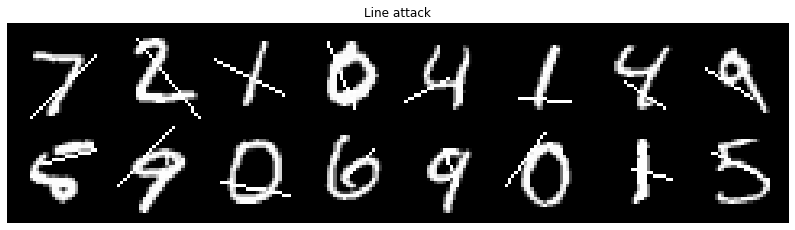

In [21]:
attack = LineAttack(color=1.0, thickness=1)
adv = attack.generate(X_test[:16])
show_img(adv, 'Line attack')

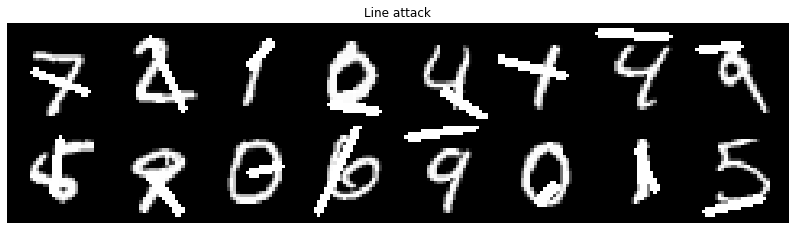

In [22]:
attack = LineAttack(color=1.0, thickness=2)
adv = attack.generate(X_test[:16])
show_img(adv, 'Line attack')

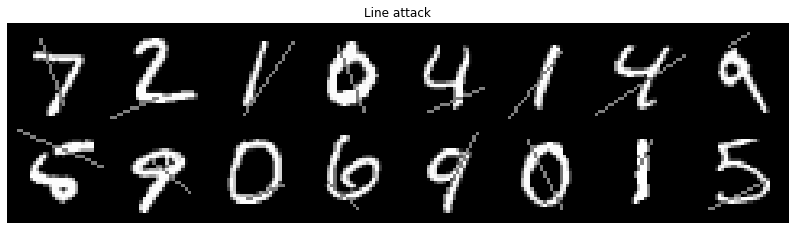

In [23]:
attack = LineAttack(color=0.5, thickness=1)
adv = attack.generate(X_test[:16])
show_img(adv, 'Line attack')

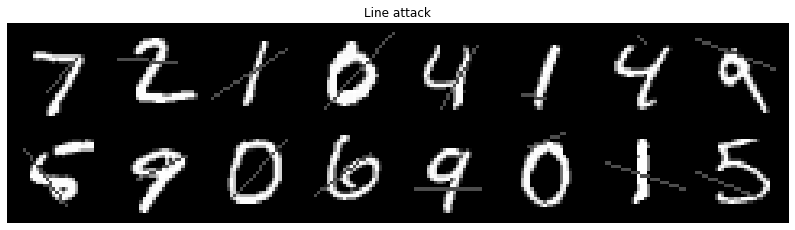

In [24]:
attack = LineAttack(color=0.3, thickness=1)
adv = attack.generate(X_test[:16])
show_img(adv, 'Line attack')

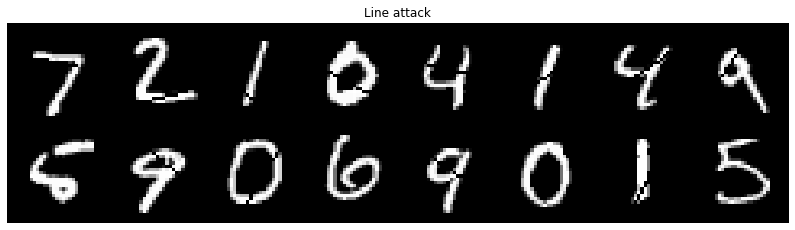

In [25]:
attack = LineAttack(color=0.0, thickness=1)
adv = attack.generate(X_test[:16])
show_img(adv, 'Line attack')

In [26]:
dataset_cifar10 = datasets.CIFAR10(PATH, train=False, download=True, transform=transforms)
X_cifar10, _ = dataset2tensor(dataset_cifar10)
X_cifar10 = X_cifar10.cpu().detach().numpy()

Files already downloaded and verified


(16, 3, 32, 32)


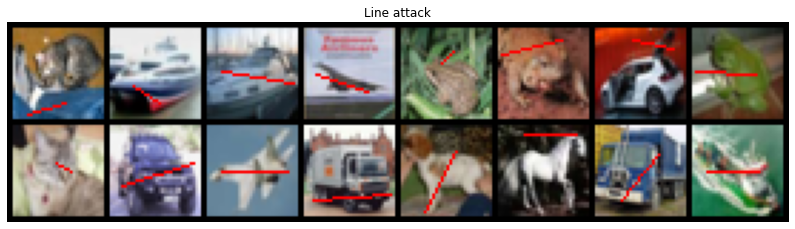

In [28]:
attack = LineAttack(color=(1,0,0), thickness=1)
adv = attack.generate(X_cifar10[:16])
show_img(adv, 'Line attack')

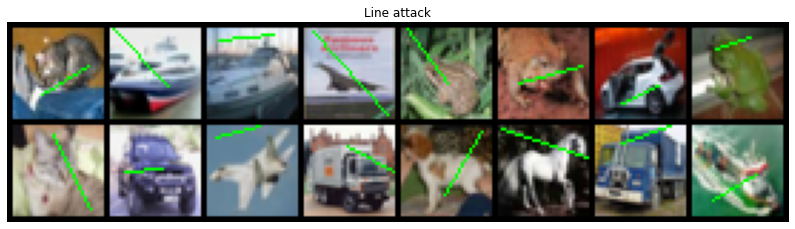

In [29]:
attack = LineAttack(color=(0,1,0), thickness=1)
adv = attack.generate(X_cifar10[:16])
show_img(adv, 'Line attack')

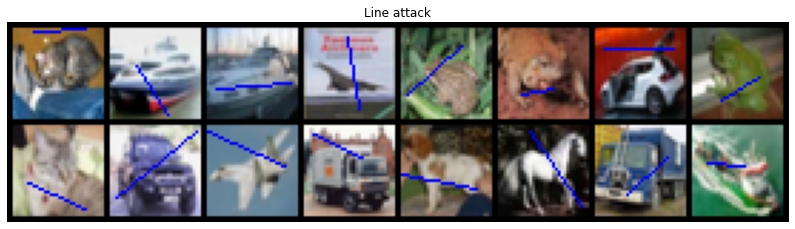

In [30]:
attack = LineAttack(color=(0,0,1), thickness=1)
adv = attack.generate(X_cifar10[:16])
show_img(adv, 'Line attack')

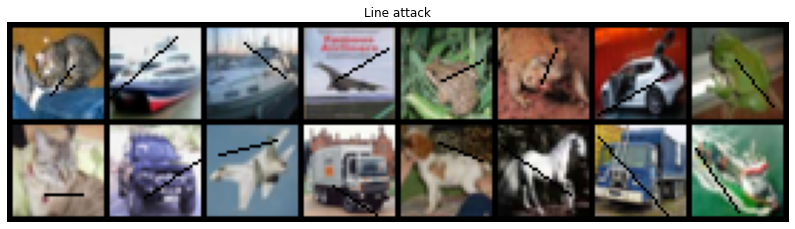

In [31]:
attack = LineAttack(color=(0,0,0), thickness=1)
adv = attack.generate(X_cifar10[:16])
show_img(adv, 'Line attack')

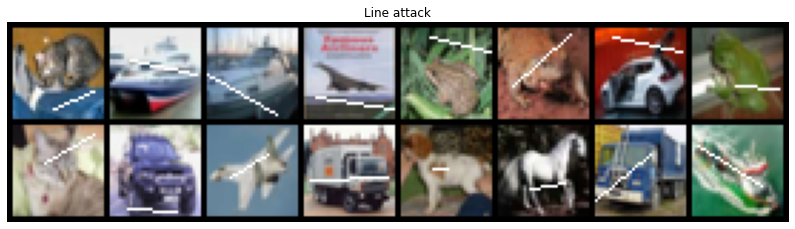

In [32]:
attack = LineAttack(color=(1,1,1), thickness=1)
adv = attack.generate(X_cifar10[:16])
show_img(adv, 'Line attack')